In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime
import yfinance as yf

In [147]:
ticker = input('Enter the stock ticker: ')

Enter the stock ticker: SBIN.NS


In [148]:
df = yf.Ticker(ticker)

In [149]:
df = df.history(period='max')

In [150]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01,12.562309,12.755722,12.460847,12.651089,43733533,0.0,0.0
1996-01-02,12.698651,12.746210,11.921829,12.248412,56167280,0.0,0.0
1996-01-03,12.318168,12.479873,11.858416,11.921830,68296318,0.0,0.0
1996-01-04,11.763293,11.985241,11.576221,11.880609,86073880,0.0,0.0
1996-01-05,11.921831,11.953537,11.734759,11.814027,76613039,0.0,0.0
...,...,...,...,...,...,...,...
2022-10-24,567.000000,572.500000,565.900024,570.500000,3692065,0.0,0.0
2022-10-25,572.500000,586.200012,568.000000,578.549988,19899324,0.0,0.0
2022-10-27,583.950012,585.000000,577.599976,579.650024,13613533,0.0,0.0


In [151]:
df = df.drop(['Dividends'], axis=1)
df = df.drop(['Stock Splits'], axis=1)

In [152]:
df

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-01,12.562309,12.755722,12.460847,12.651089,43733533
1996-01-02,12.698651,12.746210,11.921829,12.248412,56167280
1996-01-03,12.318168,12.479873,11.858416,11.921830,68296318
1996-01-04,11.763293,11.985241,11.576221,11.880609,86073880
1996-01-05,11.921831,11.953537,11.734759,11.814027,76613039
...,...,...,...,...,...
2022-10-24,567.000000,572.500000,565.900024,570.500000,3692065
2022-10-25,572.500000,586.200012,568.000000,578.549988,19899324
2022-10-27,583.950012,585.000000,577.599976,579.650024,13613533


In [153]:
df = df.reset_index()

In [154]:
df = df.drop('Date', axis=1)

In [155]:
df

,Open,High,Low,Close,Volume
0,12.562309,12.755722,12.460847,12.651089,43733533
1,12.698651,12.746210,11.921829,12.248412,56167280
2,12.318168,12.479873,11.858416,11.921830,68296318
3,11.763293,11.985241,11.576221,11.880609,86073880
4,11.921831,11.953537,11.734759,11.814027,76613039
...,...,...,...,...,...
6743,567.000000,572.500000,565.900024,570.500000,3692065
6744,572.500000,586.200012,568.000000,578.549988,19899324
6745,583.950012,585.000000,577.599976,579.650024,13613533
6746,579.950012,582.650024,567.000000,570.750000,10043644


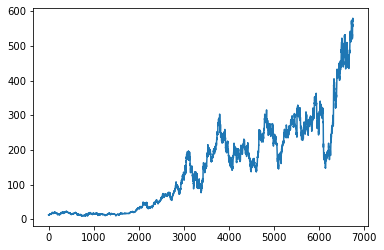

In [156]:
plt.plot(df['Close'])

In [157]:
ma100 = df['Close'].rolling(100).mean()
ma200 = df['Close'].rolling(200).mean()

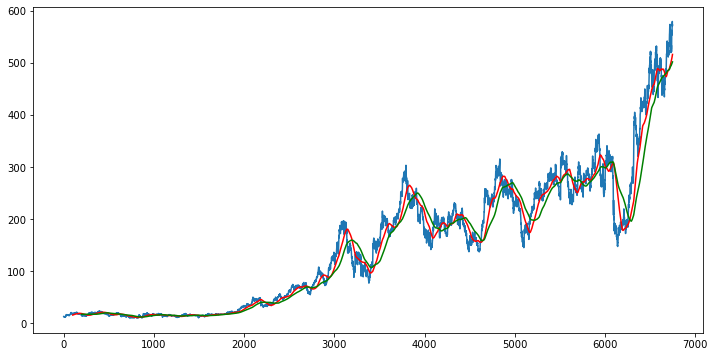

In [158]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [159]:
 df.shape

(6748, 5)

In [160]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)]) 
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))]) 

In [161]:
data_testing, data_training

(           Close
 4723  228.935181
 4724  223.261642
 4725  222.653732
 4726  228.185928
 4727  230.169769
 ...          ...
 6743  570.500000
 6744  578.549988
 6745  579.650024
 6746  570.750000
 6747  572.849976
 
 [2025 rows x 1 columns],
            Close
 0      12.651089
 1      12.248412
 2      11.921830
 3      11.880609
 4      11.814027
 ...          ...
 4718  233.152634
 4719  228.661865
 4720  229.590164
 4721  227.879608
 4722  227.549774
 
 [4723 rows x 1 columns])

In [162]:
from sklearn.preprocessing import MinMaxScaler

In [163]:
scaler = MinMaxScaler(feature_range=(0,1))

In [164]:
data_training_array = scaler.fit_transform(data_training)

In [165]:
X_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    X_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i ,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [166]:
X_train.shape

(4623, 100, 1)

Machine Learning Model

In [167]:
from keras.layers import Dense, Dropout, LSTM

In [168]:
from keras.models import Sequential

In [169]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units=1))

In [170]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)             

In [171]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
145/145 [==============================] - 48s 292ms/step - loss: 0.0165
Epoch 2/25
145/145 [==============================] - 39s 267ms/step - loss: 0.0050
Epoch 3/25
145/145 [==============================] - 40s 275ms/step - loss: 0.0045
Epoch 4/25
145/145 [==============================] - 39s 272ms/step - loss: 0.0041
Epoch 5/25
145/145 [==============================] - 42s 288ms/step - loss: 0.0035
Epoch 6/25
145/145 [==============================] - 40s 277ms/step - loss: 0.0033
Epoch 7/25
145/145 [==============================] - 40s 279ms/step - loss: 0.0031
Epoch 8/25
145/145 [==============================] - 41s 282ms/step - loss: 0.0032
Epoch 9/25
145/145 [==============================] - 40s 275ms/step - loss: 0.0028
Epoch 10/25
145/145 [==============================] - 40s 277ms/step - loss: 0.0026
Epoch 11/25
145/145 [==============================] - 42s 290ms/step - loss: 0.0026
Epoch 12/25
145/145 [==============================] - 41s 286ms/step - lo

In [172]:
model.save('keras.h5')

In [173]:
data_testing.head()

,Close
4723,228.935181
4724,223.261642
4725,222.653732
4726,228.185928
4727,230.169769


In [174]:
past_100_days = data_training.tail(100)

In [175]:
final_df = past_100_days.append(data_testing, ignore_index=True)

/var/folders/8q/hwngzqvx0871np5x0mj6_d9h0000gn/T/ipykernel_30494/531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [176]:
input_data = scaler.fit_transform(final_df)

In [177]:
input_data

array([[0.10340621],
       [0.10922801],
       [0.10469193],
       ...,
       [1.        ],
       [0.97990025],
       [0.98464282]])

In [178]:
X_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)

In [179]:
y_predicted = model.predict(X_test)

76/76 [==============================] - 9s 111ms/step


In [180]:
y_predicted

array([[0.17439207],
       [0.17718872],
       [0.1799959 ],
       ...,
       [0.8710344 ],
       [0.88054717],
       [0.8887994 ]], dtype=float32)

In [181]:
y_predicted.shape

(2425, 1)

Convert Scaled value to normal value

In [182]:
scaler.scale_

array([0.00225839])

In [183]:
scale_factor = 1 / 0.00559049

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

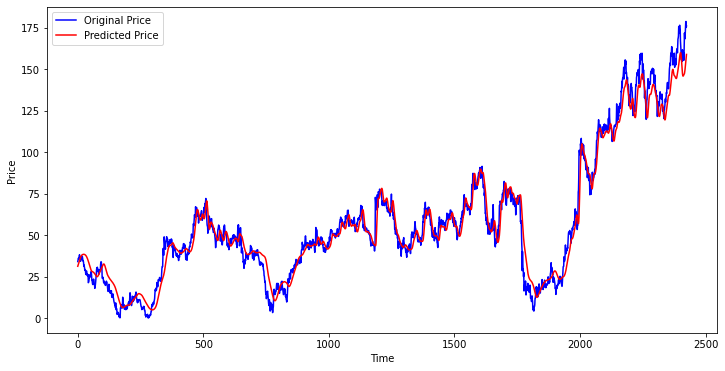

In [185]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()